<a href="https://colab.research.google.com/github/Abinash2249/Broadway_Infosys_Data_Science_Project/blob/main/3_Missing_values_handling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown 1g1nwk4k-h9FceEHKZc8ocfu_xp3xnZ8R

Downloading...
From: https://drive.google.com/uc?id=1g1nwk4k-h9FceEHKZc8ocfu_xp3xnZ8R
To: /content/hr.csv
100% 580k/580k [00:00<00:00, 8.58MB/s]


In [ ]:
import pandas as pd
df = pd.read_csv("/content/hr.csv")

# Data Profiling and Inspection

In [ ]:
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,age
0,0.24,0.79,2,175,5,0,0,0,IT,low,NaN
1,0.40,0.49,2,155,3,0,1,0,hr,medium,27.0
2,0.45,0.45,2,154,3,1,1,0,support,medium,NaN
3,0.46,0.73,6,256,4,0,0,0,product_mng,high,NaN
4,0.14,0.54,5,275,4,1,0,0,sales,high,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15004 entries, 0 to 15003
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15004 non-null  float64
 1   last_evaluation        15004 non-null  float64
 2   number_project         15004 non-null  int64  
 3   average_montly_hours   15004 non-null  int64  
 4   time_spend_company     15004 non-null  int64  
 5   Work_accident          15004 non-null  int64  
 6   left                   15004 non-null  object 
 7   promotion_last_5years  15004 non-null  int64  
 8   Department             15004 non-null  object 
 9   salary                 14975 non-null  object 
 10  age                    3080 non-null   float64
dtypes: float64(3), int64(5), object(3)
memory usage: 1.3+ MB


* The data types present in this dataset are: integer, float and object meaning it contains both numeric as well as categorical values.
* There are 15004 rows and 11 columns.

* There are 29 missing values in the column "salary" and 11924 missing values in the column "age".

# Descriptive statistics

* Now, there are no missing values in the dataset, so we can move ahead.

In [ ]:
df.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,age
0,0.24,0.79,2,175,5,0,0,0,IT,low,NaN
1,0.40,0.49,2,155,3,0,1,0,hr,medium,27.0


In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,age
count,15004.000000,15004.000000,15004.000000,15004.000000,15004.000000,15004.000000,15004.000000,3080.000000
mean,0.612871,0.716096,3.802919,201.044655,3.497934,0.144561,0.021261,27.018506
std,0.248628,0.171163,1.232550,49.937662,1.460012,0.351670,0.144258,1.429511
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,25.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,26.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,27.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,28.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,29.000000


* The dataset contains information regarding satisfaction level of employees. The average (mean) satisfaction level is 0.61. The lowest satisfaction level in the dataset happens to be 0.09 and highest happens to be 1 which indicating the minimum and maximum satisfactiin level in the dataset.

In [ ]:
df.describe(include = "object")

,left,Department,salary
count,15004,15004,14975
unique,3,10,3
top,0,sales,low
freq,11428,4140,7289


* From the above information we know that, there are 3 categorries in the "left" column, 10 Departments in the organization and 3 categories of salary. The Department with the highest employees is "sales" and the salary category of most employees is profiled as "low".

In [ ]:
df["left"].value_counts()

left
0    11428
1     3572
?        4
Name: count, dtype: int64

# Exploratory Data Analysis (EDA)

In [ ]:
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,age
0,0.24,0.79,2,175,5,0,0,0,IT,low,NaN
1,0.40,0.49,2,155,3,0,1,0,hr,medium,27.0
2,0.45,0.45,2,154,3,1,1,0,support,medium,NaN
3,0.46,0.73,6,256,4,0,0,0,product_mng,high,NaN
4,0.14,0.54,5,275,4,1,0,0,sales,high,NaN


In [ ]:
df.shape

(15004, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15004 entries, 0 to 15003
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15004 non-null  float64
 1   last_evaluation        15004 non-null  float64
 2   number_project         15004 non-null  int64  
 3   average_montly_hours   15004 non-null  int64  
 4   time_spend_company     15004 non-null  int64  
 5   Work_accident          15004 non-null  int64  
 6   left                   15004 non-null  object 
 7   promotion_last_5years  15004 non-null  int64  
 8   Department             15004 non-null  object 
 9   salary                 14975 non-null  object 
 10  age                    3080 non-null   float64
dtypes: float64(3), int64(5), object(3)
memory usage: 1.3+ MB


In [ ]:
cor = df.corr(numeric_only = True)
cor

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,age
satisfaction_level,1.000000,0.104922,-0.142868,-0.020031,-0.100977,0.058624,0.025579,-0.004563
last_evaluation,0.104922,1.000000,0.349291,0.339727,0.131578,-0.007089,-0.008677,-0.003529
number_project,-0.142868,0.349291,1.000000,0.417264,0.196729,-0.004695,-0.006047,-0.021672
average_montly_hours,-0.020031,0.339727,0.417264,1.000000,0.127790,-0.010095,-0.003527,-0.011521
time_spend_company,-0.100977,0.131578,0.196729,0.127790,1.000000,0.002204,0.067457,-0.003475
Work_accident,0.058624,-0.007089,-0.004695,-0.010095,0.002204,1.000000,0.039264,0.017154
promotion_last_5years,0.025579,-0.008677,-0.006047,-0.003527,0.067457,0.039264,1.000000,0.014792
age,-0.004563,-0.003529,-0.021672,-0.011521,-0.003475,0.017154,0.014792,1.000000


<Axes: >

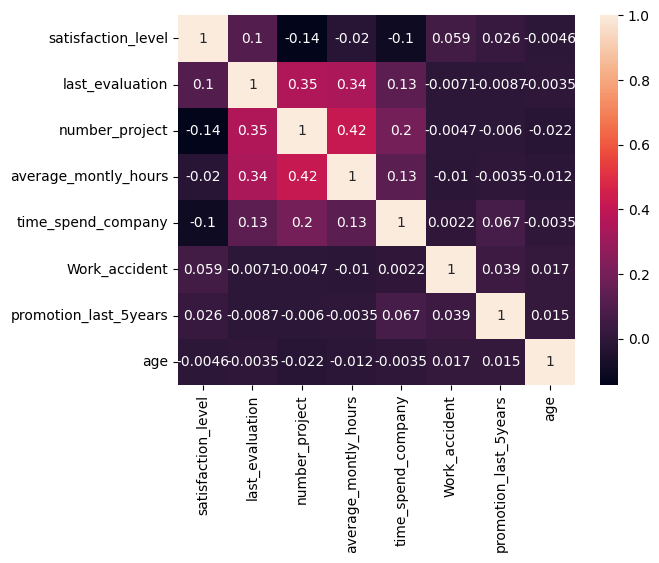

In [ ]:
import seaborn as sns
sns.heatmap(cor, annot = True)

# Handling missing values

In [ ]:
df.isna().sum()

satisfaction_level           0
last_evaluation              0
number_project               0
average_montly_hours         0
time_spend_company           0
Work_accident                0
left                         0
promotion_last_5years        0
Department                   0
salary                      29
age                      11924
dtype: int64

* As there are only 29 missing values in the salary column, we can drop the rows with missing values of salary as the dataset is huge, so discarding 29 rows won't cause a great impact.

In [ ]:
df.dropna(subset=["salary"], inplace = True)

<Axes: ylabel='age'>

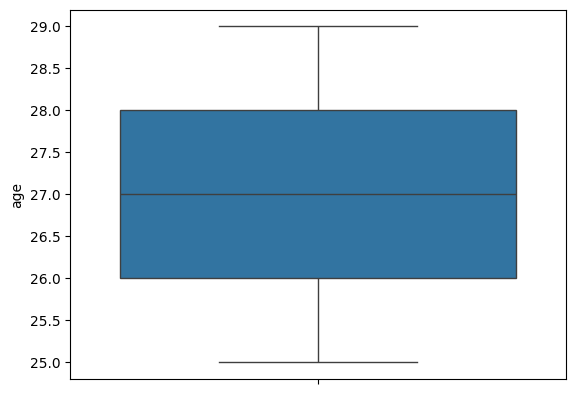

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(df["age"])

* In the above boxplot, we can see that there are no outliers, so we can proceed to full the null values in the "age" column with the mean.

In [ ]:
df["age"].fillna(df["age"].mean(), inplace = True)

In [ ]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
age                      0
dtype: int64

In [ ]:
df["left"].value_counts()

left
0    11408
1     3563
?        4
Name: count, dtype: int64

* Here, we can see that the column "left" still contains missing values as "?". There are only 4 rows where the values in "left" column is missing, so we can remove those 4 rows.

In [ ]:
import numpy as np

df["left"].replace("?", np.nan, inplace = True)

In [ ]:
df.dropna(subset="left", inplace = True)

In [ ]:
df["left"].value_counts()

left
0    11408
1     3563
Name: count, dtype: int64

* From the above table, we can imply that there are 2 categories in the column "left", 10 categories in the column "Department" and 3 categories in the column "salary". The Department with the highest employees is "sales" and the salary category of most employees is profiled as "low".

In [ ]:
df["salary"].value_counts()

salary
low       7287
medium    6447
high      1237
Name: count, dtype: int64

* We can see the frequency of each salary profiles. The number of employees with low salary is 7289, medium salary is 6449 and high salary is 1237.

In [ ]:
df["Department"].value_counts()

Department
sales          4135
technical      2718
support        2224
IT             1222
product_mng     900
marketing       856
RandD           786
accounting      763
hr              738
management      629
Name: count, dtype: int64

* We can see the name of the Departments along with the number of employees working in that department in the above information.

# One hot encoding

In [ ]:
df_encoded = pd.get_dummies(df, columns=["Department", "salary"], drop_first = True)

# Using logistic regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df_encoded.drop(columns=["left"])
y = df_encoded["left"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state = 42)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy = {accuracy}")

print("Classification Report")
print(classification_report(y_test, y_pred))

print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

Accuracy = 0.7916527545909849
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      2279
           1       0.61      0.36      0.45       716

    accuracy                           0.79      2995
   macro avg       0.72      0.64      0.66      2995
weighted avg       0.77      0.79      0.77      2995

Confusion Matrix
[[2112  167]
 [ 457  259]]


* The accuracy of this model is approximately 79.17%.
* Precision:
  * Out of all instances, the model correctly predicted 82% as not having left the company.
  * Out of all instances, the model correctly predicted 61% as having left the company.
* Recall:
  * Out of all actual instances of not having left the company, the model correctly predicted 93% as not having left the company.
  *Out of all actual instances of having left the company, the model correctly predicted 36% as having left the company.
* F1-score:
  * The harmonic mean of precision and recall of class 0 (not having left the company) is 0.87.
  * The harmonic mean of precision and recall of class 1 (having left the company) is 0.45.
* Support:
  * There are 2279 instances in the test data which are actually not having left the company.
  * There are 716 instances in the test data which are actually having left the company.
* Confusion matrix:
  * The model correctly predicted 2112 instances as not having left the company.
  * The model incorrectly predicted 167 instances as not having left the company when they had left.
  * The model incorrectly predicted 457 instances as having left the company when they had not left.
  * The model correctly predicted 259 instances as having left the company.

# Using SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel = "linear", max_iter=1000)
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy = {accuracy_svm}")

print("Classification Report of model using SVM")
print(classification_report(y_test, y_pred_svm))

print("Confusion Matrix of model using SVM")
print(confusion_matrix(y_test, y_pred_svm))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy = 0.6464106844741235
Classification Report of model using SVM
              precision    recall  f1-score   support

           0       0.81      0.69      0.75      2279
           1       0.34      0.50      0.40       716

    accuracy                           0.65      2995
   macro avg       0.58      0.60      0.58      2995
weighted avg       0.70      0.65      0.67      2995

Confusion Matrix of model using SVM
[[1580  699]
 [ 360  356]]


* The accuracy of this model is approximately 64.64%.
* Precision:
  * Out of all instances, the model correctly predicted 81% as not having left the company.
  * Out of all instances, the model correctly predicted 34% as having left the company.
* Recall:
  * Out of all actual instances of not having left the company, the model correctly predicted 69% as not having left the company.
  * Out of all actual instances of having left the company, the model correctly predicted 50% as having left the company.
* F1-score:
  * The harmonic mean of precision and recall of class 0 (not having left the company) is 0.75.
  * The harmonic mean of precision and recall of class 1 (having left the company) is 0.40.
* Support:
  * There are 2279 instances in the test data which are actually not having left the company.
  * There are 716 instances in the test data which are actually having left the company.
* Confusion matrix:
  * The model correctly predicted 1580 instances as not having left the company.
  * The model incorrectly predicted 699 instances as not having left the company when they had left.
  * The model incorrectly predicted 360 instances as having left the company when they had not left.
  * The model correctly predicted 356 instances as having left the company.

# Comparison between LogisticRegression and SVC

* The Logistic Regression model outperforms the SVM model in terms of accuracy, precision, recall, and F1-score for both classes.
* The Logistic Regression model has higher precision, recall, and F1-score for predicting both classes.
* The SVM model has a lower accuracy and performs relatively poorer in terms of precision, recall, and F1-score for both classes compared to the Logistic Regression model.
* Both models have similar support values and confusion matrix structures, but the Logistic Regression model makes fewer incorrect predictions overall.